<a href="https://colab.research.google.com/github/luciojosep/Portfolio/blob/main/Clase_5_Intervalos_de_confianza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis Cuantitativo avanzado**
# **Clase 5: Intervalos de confianza**
# *Lic. Lucio José Pantazis*

## Motivación


### Población

Supongamos que en una población estadounidense con una gran cantidad de individuos empadronados para votar, se divide entre personas que votan al partido republicano y las que votan al partido demócrata.

In [ ]:
import numpy as np

In [ ]:
np.random.seed(0)
N=900
L=3
xs=L*np.random.rand(N)
ys=L*np.random.rand(N)
us=np.random.rand(N)

In [ ]:
def asig(x,y,u,ps):
  xR=np.ceil(x)
  yR=np.floor(y)
  ind=int(xR+3*yR)
  if u<ps[ind]:
    c="b"
  else:
    c="r"
  return c

In [ ]:
ps=[0.5]*11
cs=[asig(xs[i],ys[i],us[i],ps) for i in range(N)]

In [ ]:
import matplotlib.pyplot as plt

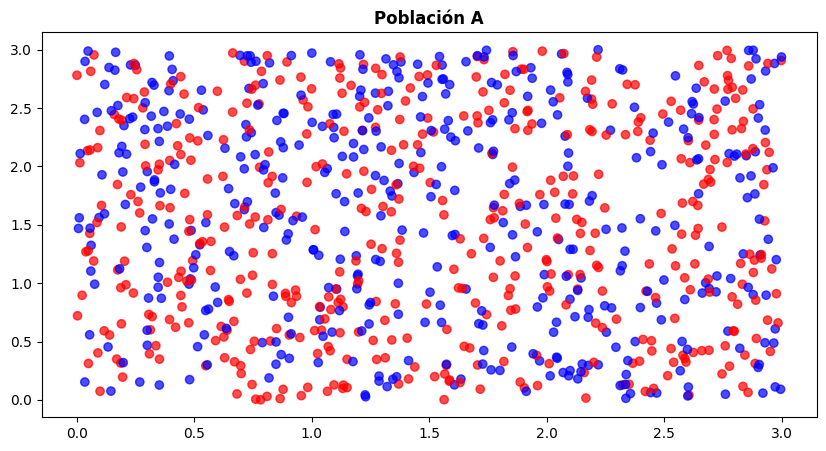

In [ ]:
plt.scatter(x=xs,y=ys,c=cs,alpha=0.7)
plt.title("Población A",weight="bold")
plt.show()

### Parámetro poblacional

Para saber qué porcentaje de los votantes se vuelcan por el partido demócrata (llamémoslo $\pi$), habría que preguntarle a todas las personas de la población (supongamos que son $N$), y suponiendo que sus respuestas son fidedignas, con la cantidad de personas que votan al partido demócrata $D$, se puede obtener el porcentaje **real** de personas que votan al partido demócrata del siguiente modo:
$$\pi =\dfrac{D}{N}*100\% $$

Este porcentaje se llama porcentaje **poblacional**

### Muestreo

El problema es que no siempre se puede realizar una encuesta tan extensiva (sin esperar a las elecciones, que sería lo más extensivo posible). Por lo tanto, se extrae una **muestra** de la población para sacar alguna conclusión de lo que sucede en la población total.

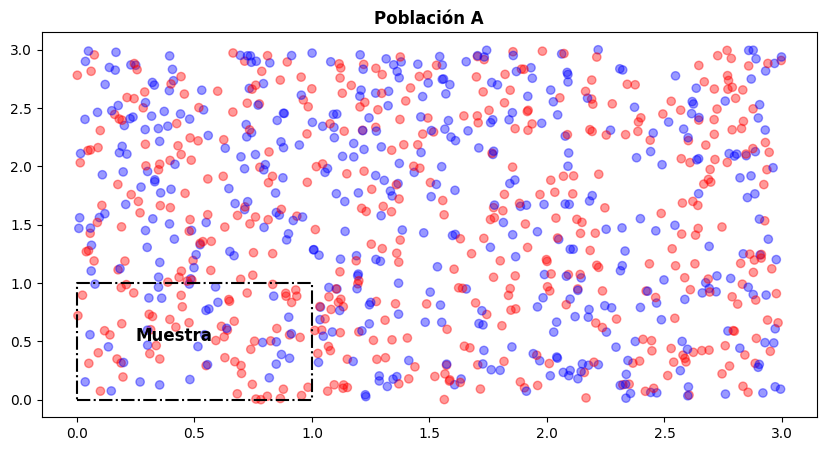

In [ ]:
plt.scatter(x=xs,y=ys,c=cs,alpha=0.4)
plt.plot([0,1,1,0,0],[0,0,1,1,0],"k-.")
plt.title("Población A",weight="bold")
plt.text(x=0.25,y=0.5,s="Muestra",size=12,weight="bold")
plt.show()

### Estimación puntual

En esta muestra de $n$ personas, se puede contar cuántos votantes $d$ del partido demócrata hay y **estimar** el porcentaje poblacional $\pi$ con el siguiente valor $\widehat{p}$, denominado porcentaje **muestral**:
$$\widehat{p} =\dfrac{d}{n}*100\% $$

In [ ]:
nSec=lambda i: np.sum([int(np.floor(xs[k])+3*np.floor(ys[k]))==i for k in range(N)])
fSec=lambda i: np.sum([cs[k]=="b" for k in range(N) if int(np.floor(xs[k])+3*np.floor(ys[k]))==i])
fs=list(map(fSec,list(range(9))))
ns=list(map(nSec,list(range(9))))
pEs=np.round(np.array(fs)/np.array(ns)*100,2)
print(pEs)
pEs1=pEs.copy()

[35.16 42.86 51.79 49.47 51.19 40.74 54.87 55.56 46.08]


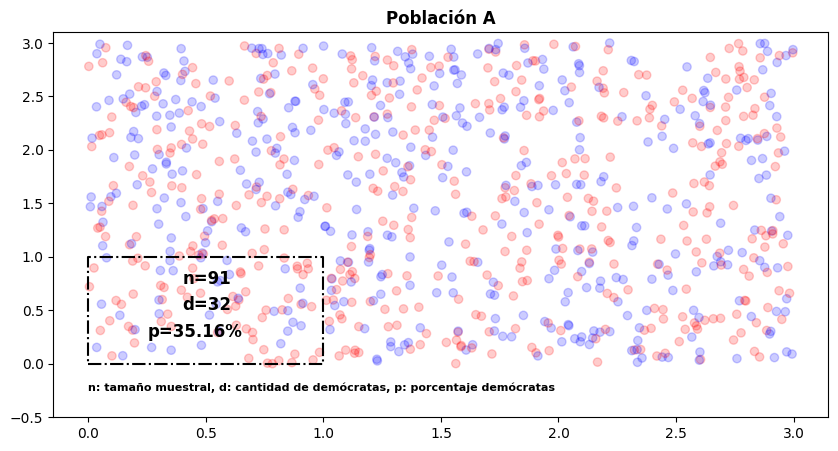

In [ ]:
plt.scatter(x=xs,y=ys,c=cs,alpha=0.2)
plt.plot([0,1,1,0,0],[0,0,1,1,0],"k-.")
plt.text(x=0.4,y=0.75,s="n="+str(ns[0]),size=12,weight="bold")
plt.text(x=0.4,y=0.5,s="d="+str(fs[0]),size=12,weight="bold")
plt.text(x=0.25,y=0.25,s="p="+str(pEs[0])+"%",size=12,weight="bold")
plt.text(x=0,y=-0.25,s="n: tamaño muestral, d: cantidad de demócratas, p: porcentaje demócratas" ,size=8,weight="bold")
plt.ylim([-0.5,3.1])
plt.title("Población A",weight="bold")
plt.show()

**Basados en esta muestra**, podríamos decir que el valor estimado para el porcentaje de la población $\pi$ es $\widehat{p}=35.16\%$. Sin embargo, este valor es **estimado**, no tiene por qué ser igual (ni siquiera parecido).

### Muestreo

Más aún, así como se tomó una muestra, se podría haber tomado otra:

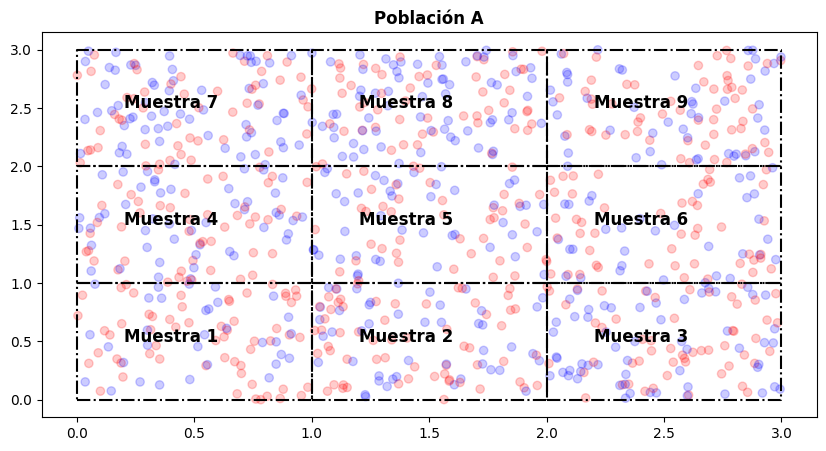

In [ ]:
plt.scatter(x=xs,y=ys,c=cs,alpha=0.2)
[plt.plot([i+0,i+1,i+1,i+0,i+0],[j+0,j+0,j+1,j+1,j+0],"k-.") for i in range(3) for j in range(3)]
[plt.text(x=i+0.2,y=j+0.5,s="Muestra "+str(int(i)+3*int(j)+1),size=12,weight="bold") for i in range(3) for j in range(3)]
plt.title("Población A",weight="bold")
plt.show()

### Variabilidad muestral

Estas distintas muestras dan distintos valores:

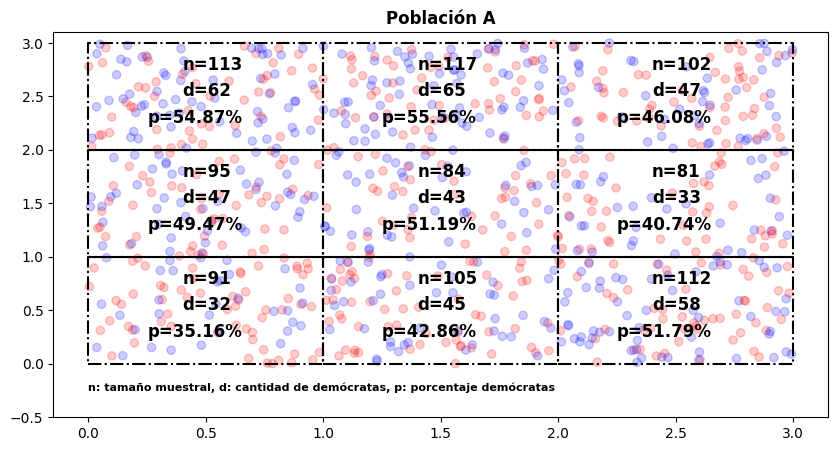

In [ ]:
plt.scatter(x=xs,y=ys,c=cs,alpha=0.2)
[plt.plot([i+0,i+1,i+1,i+0,i+0],[j+0,j+0,j+1,j+1,j+0],"k-.") for i in range(3) for j in range(3)]
[plt.text(x=i+0.4,y=j+0.75,s="n="+str(ns[int(i)+3*int(j)]),size=12,weight="bold") for i in range(3) for j in range(3)]
[plt.text(x=i+0.4,y=j+0.5,s="d="+str(fs[int(i)+3*int(j)]),size=12,weight="bold") for i in range(3) for j in range(3)]
[plt.text(x=i+0.25,y=j+0.25,s="p="+str(pEs[int(i)+3*int(j)])+"%",size=12,weight="bold") for i in range(3) for j in range(3)]
plt.text(x=0,y=-0.25,s="n: tamaño muestral, d: cantidad de demócratas, p: porcentaje demócratas" ,size=8,weight="bold")
plt.ylim([-0.5,3.1])
plt.title("Población A",weight="bold")
plt.show()

Viendo los valores estimados, podemos notar algunas cosas:

* los valores estimados fluctúan, en valores cercanos al 50%.
* los tamaños muestrales son similares, haciendo que las muestras sean comparables.
* no podemos saber el valor real $\pi$ con ninguna de estas muestras individualmente.

La última observación es la más importante, ya que cuando se tome una muestra, esa muestra es **única**. Por lo tanto, debemos basarnos en el correspondiente valor muestral $\widehat{p}$, aunque no tengamos certeza de si representa o no el valor $\pi$ que queremos estimar.

De todas formas, al menos como abstracción, vamos a asumir que tomamos **varias** muestras para analizar qué escenarios podemos observar.



### Valores estimados

Otra forma de visualizarlo es mediante un gráfico de dispersión:

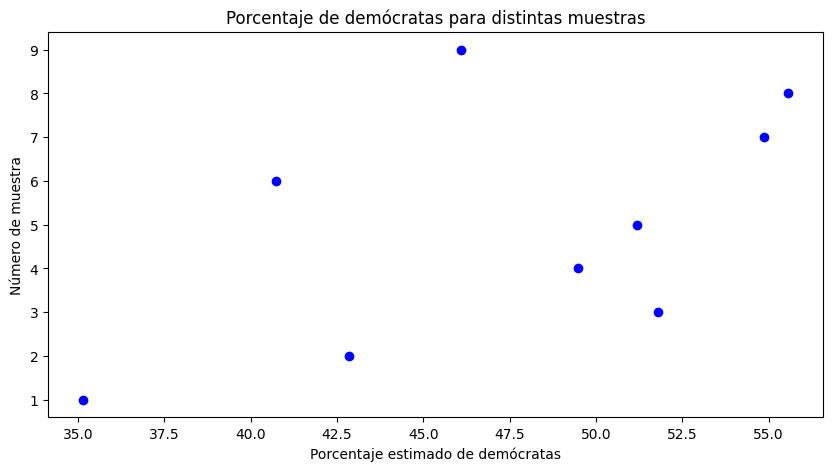

In [ ]:
plt.scatter(pEs1,np.arange(9)+1,marker="o",c="b")
plt.title("Porcentaje de demócratas para distintas muestras")
plt.xlabel("Porcentaje estimado de demócratas")
plt.ylabel("Número de muestra")
plt.show()

Para ver cómo se distribuyen estos valores, podemos colapsar los valores de las mismas muestras en un único eje.

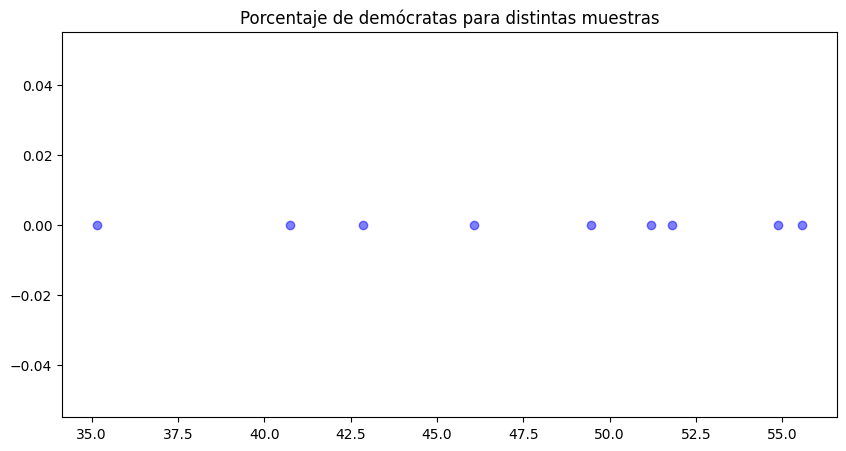

In [ ]:
plt.scatter(pEs,[0]*9,marker="o",c="b",alpha=0.5)
plt.title("Porcentaje de demócratas para distintas muestras")
plt.show()

Tomando más muestras (fijamos un tamaño de 100 individuos), podemos tener una idea de cuánto varían los valores estimados del porcentaje de demócratas.

In [ ]:
M=1000
n=100
pEs=[0]*M
np.random.seed(0)
for i in range(M):
  mues=np.random.choice(cs,replace=False,size=n)
  pEs[i]=np.sum(mues=="b")/n*100

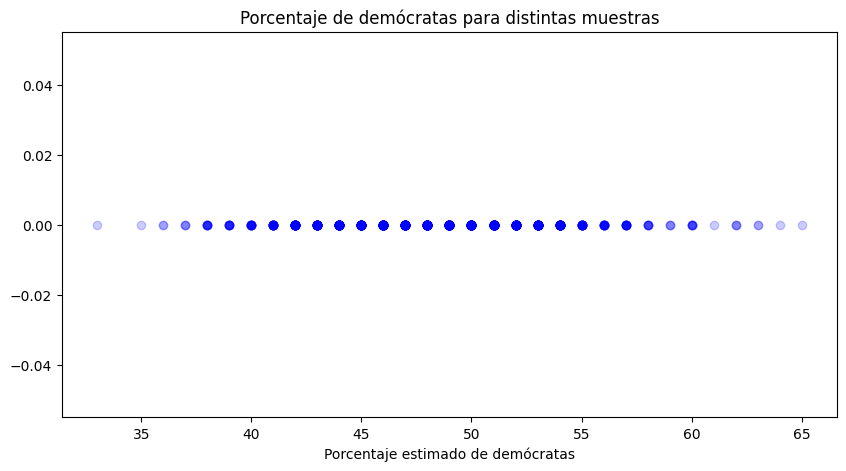

In [ ]:
plt.scatter(pEs,[0]*M,marker="o",c="b",alpha=0.2)
plt.title("Porcentaje de demócratas para distintas muestras")
plt.xlabel("Porcentaje estimado de demócratas")
plt.show()

Este gráfico permite ver que los valores estimados se movieron entre 35% y 65%, pero como hay mucha superposición, no se permite ver qué valores son más frecuentes.

Por lo que se puede utilizar el eje y para representar cuáles de los valores son más frecuentes, donde cada dato "se apila" sobre los datos anteriores del mismo valor. Por lo tanto, mientras más frecuente sea un valor, más altura se verá en el gráfico:

In [ ]:
import pandas as pd
df=pd.DataFrame({"ps":pEs})
df_c=df.value_counts()
labs=[lab[0] for lab in df_c.index.values]
fS=[int(df_c.loc[lab]) for lab in labs]

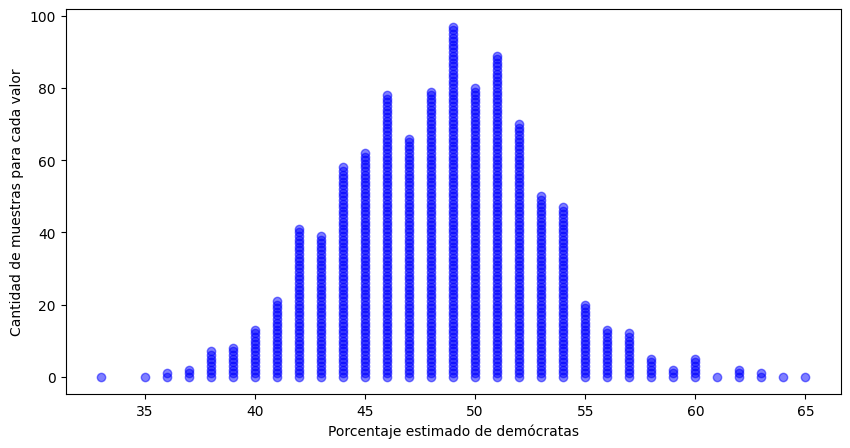

In [ ]:
K=len(labs)
for i in range(K):
  plt.scatter([np.round(labs[i])]*fS[i],np.arange(fS[i]),marker="o",c="b",alpha=0.5)
plt.xlabel("Porcentaje estimado de demócratas")
plt.ylabel("Cantidad de muestras para cada valor")
plt.show()

Vemos aquí que los valores más frecuentes efectivamente están entre 40 y 55%

### Tamaño muestral

¿Qué pasa si aumentamos el número de individuos en la muestra? Podemos tomar por ejemplo, muestras de 500 individuos y ver si cambian los valores estimados de porcentaje de demócratas:

In [ ]:
M=1000
n=500
pEs=[0]*M
np.random.seed(0)
for i in range(M):
  mues=np.random.choice(cs,replace=False,size=n)
  pEs[i]=np.sum(mues=="b")/n*100

In [ ]:
df=pd.DataFrame({"ps":pEs})
df_c=df.value_counts()
labs=[lab[0] for lab in df_c.index.values]
fS=[int(df_c.loc[lab]) for lab in labs]

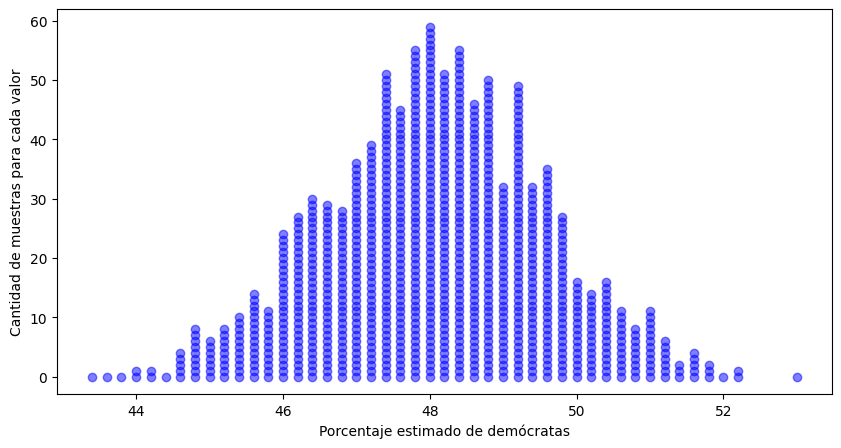

In [ ]:
K=len(labs)
for i in range(K):
  plt.scatter([labs[i]]*fS[i],np.arange(fS[i]),marker="o",c="b",alpha=0.5)
plt.xlabel("Porcentaje estimado de demócratas")
plt.ylabel("Cantidad de muestras para cada valor")
plt.show()

En este caso, vemos que los valores se distribuyen con una forma similar, pero mucho más concentrados alrededor del 48%, ya que los valores estimados se mueven mayoritariamente entre 44% y 52%.

Por lo tanto, para este tamaño muestral mayor, si bien cada muestra individualmente no permite saber cuál es el valor poblacional, tenemos un rango de valores más estrecho y por lo tanto, más **confianza** de que los valores estimados $p$ se acercan al valor real $\pi$. Notar que dar un rango de valores entre 44% y 52% es mucho más preciso que establecer como un rango de valores entre 35% y 65%.

## Intervalos de confianza

Como dijimos anteriormente, ninguna estimación $p$ basada en una única muestra, nos da un valor necesariamente confiable de cuál es el valor poblacional $\pi$.

Sin embargo, la idea de dar un **rango** de valores, puede ser más confiable que un único valor. Mientras más estrecho sea ese rango de valores, más informativo será sobre el valor de $\pi$. Para ir al otro extremo, decir que el porcentaje de demócratas es entre 0% y 100% es absolutamente confiable, pero poco informativo. Sin embargo, rangos demasiado estrechos pueden dejar de ser confiables a la hora de representar al valor $\pi$. Entonces, en la construcción del intervalo debe hacerse un equilibrio entre las siguientes cuestiones:
* Confiabilidad: representatividad del valor real
* Precisión: cuán informativo es el intervalo sobre el valor real

Por lo tanto, podemos valernos de los gráficos de frecuencia previos para construir dicho rango de valores. Empezamos con las muestras de 100 personas:

In [ ]:
M=1000
n=100
pEs=[0]*M
np.random.seed(0)
for i in range(M):
  mues=np.random.choice(cs,replace=False,size=n)
  pEs[i]=np.sum(mues=="b")/n*100

In [ ]:
df=pd.DataFrame({"ps":pEs})
df_c=df.value_counts()
labs=[lab[0] for lab in df_c.index.values]
fS=[int(df_c.loc[lab]) for lab in labs]

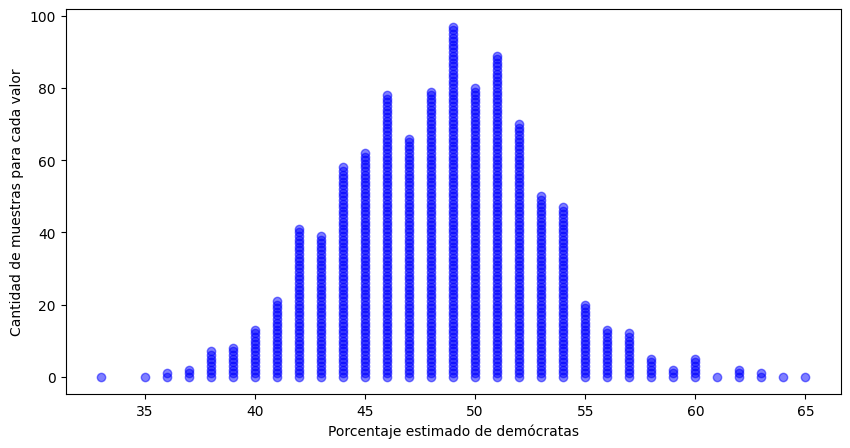

In [ ]:
K=len(labs)
for i in range(K):
  plt.scatter([labs[i]]*fS[i],np.arange(fS[i]),marker="o",c="b",alpha=0.5)
plt.xlabel("Porcentaje estimado de demócratas")
plt.ylabel("Cantidad de muestras para cada valor")
plt.show()

Vemos que por azar, hubieron algunos valores extremos cerca del 35% o del 65%, pero justamente estos valores no representan bien a **la media**. Por lo tanto, nuestro rango de valores puede excluir los casos atípicos para ganar un poco de precisión, quedándonos con el 95% **central** de los valores obtenidos en las muestras:

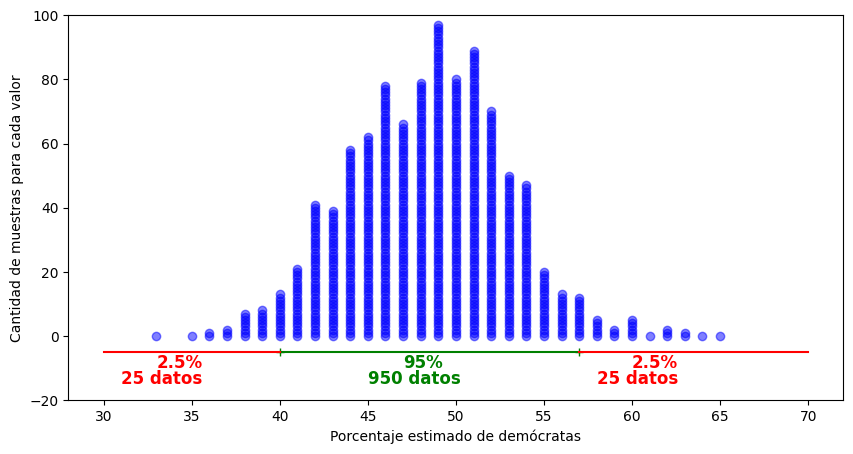

In [ ]:
K=len(labs)
li=np.quantile(pEs,0.025)
ls=np.quantile(pEs,0.975)
for i in range(K):
  plt.scatter([labs[i]]*fS[i],np.arange(fS[i]),marker="o",c="b",alpha=0.5)
plt.plot([li,ls],[-5]*2,c="g",marker="+")
plt.plot([30,li],[-5]*2,c="r")
plt.plot([ls,70],[-5]*2,c="r")
plt.text(x=47,y=-10,s="95%",size=12,weight="bold",color="g")
plt.text(x=60,y=-10,s="2.5%",size=12,weight="bold",color="r")
plt.text(x=33,y=-10,s="2.5%",size=12,weight="bold",color="r")
plt.text(x=45,y=-15,s="950 datos",size=12,weight="bold",color="g")
plt.text(x=58,y=-15,s="25 datos",size=12,weight="bold",color="r")
plt.text(x=31,y=-15,s="25 datos",size=12,weight="bold",color="r")
plt.xlabel("Porcentaje estimado de demócratas")
plt.ylabel("Cantidad de muestras para cada valor")
plt.ylim([-20,100])
plt.show()

In [ ]:
print("Rango de valores:")
print([li,np.round(ls)])

Rango de valores:
[40.0, 57.0]


Es decir, según lo observado, se puede establecer un rango de valores posibles para porcentaje de demócratas **poblacional** entre 40% y 57%.

Ahora vemos que sucede para las muestras de tamaño 500

In [ ]:
M=1000
n=500
pEs=[0]*M
np.random.seed(0)
for i in range(M):
  mues=np.random.choice(cs,replace=False,size=n)
  pEs[i]=np.sum(mues=="b")/n*100

In [ ]:
df=pd.DataFrame({"ps":pEs})
df_c=df.value_counts()
labs=[lab[0] for lab in df_c.index.values]
fS=[int(df_c.loc[lab]) for lab in labs]

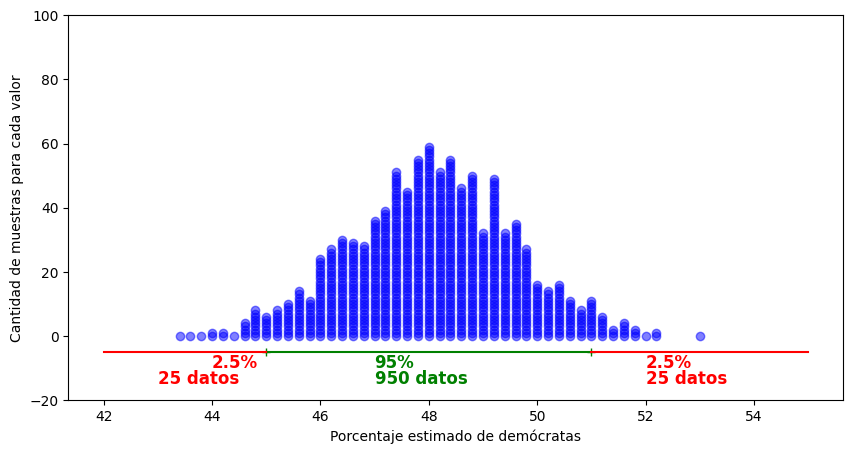

In [ ]:
K=len(labs)
li=np.quantile(pEs,0.025)
ls=np.quantile(pEs,0.975)
for i in range(K):
  plt.scatter([labs[i]]*fS[i],np.arange(fS[i]),marker="o",c="b",alpha=0.5)
plt.plot([li,ls],[-5]*2,c="g",marker="+")
plt.plot([42,li],[-5]*2,c="r")
plt.plot([ls,55],[-5]*2,c="r")
plt.text(x=47,y=-10,s="95%",size=12,weight="bold",color="g")
plt.text(x=52,y=-10,s="2.5%",size=12,weight="bold",color="r")
plt.text(x=44,y=-10,s="2.5%",size=12,weight="bold",color="r")
plt.text(x=47,y=-15,s="950 datos",size=12,weight="bold",color="g")
plt.text(x=52,y=-15,s="25 datos",size=12,weight="bold",color="r")
plt.text(x=43,y=-15,s="25 datos",size=12,weight="bold",color="r")
plt.xlabel("Porcentaje estimado de demócratas")
plt.ylabel("Cantidad de muestras para cada valor")
plt.ylim([-20,100])
plt.show()

In [ ]:
print("Rango de valores:")
print([li,np.round(ls)])

Rango de valores:
[45.0, 51.0]


Vemos que aún cuando se busca el mismo porcentaje de datos centrales (95%) el rango de valores en el primer caso (40%-57%) es mucho más amplo que el segundo caso (45%-51%). Esto se debe a que si los valores están más concentrados, el 95% central estará más concentrado también. En contraposición, si los datos están más dispersos, también lo estarán el 95% central. Por lo tanto, una cuestión clave en la construcción de estos intervalos es la **variabilidad**.

De todas formas, hay que destacar que este procedimiento no es válido en la práctica, ya que se toma una única muestra, y no disponemos de distintos porcentajes para poder tomar "el 95% central". Entonces, ¿cómo hacemos para calcular ese rango de valores?

## Intervalos de confianza

En algunos contados casos, se puede establecer una distribución teórica para los promedios (o alguna otra función de los datos), que se puede adaptar al porcentaje desconocido que queremos estimar. En general, se asume que dicha distribución es normal.

Asumiendo dicha distribución, se pueden encontrar los valores del promedio más extremos (a ambos lados) que tengan 2.5% de probabilidad de ocurrir. Para calcular un intervalo de confianza para una proporción o porcentaje, se asume que (según la distribución asumida), un rango de valores probable se calcula del siguiente modo:
$$ \text{porcentaje muestral} \; \underline{+} \; 1.96\cdot \sqrt{\dfrac{\text{porcentaje muestral} \cdot (100-\text{porcentaje muestral})}{\text{tamaño muestral}}}=$$   $$=\widehat{p}\; \underline{+} \; 1.96\cdot \sqrt{\dfrac{\widehat{p}\cdot (100-\widehat{p})}{n}}  $$

Donde $\widehat{p}$ representa el porcentaje de demócratas observado en la muestra, y 1.96 es el valor que deja 2.5% de probabilidad de estar a su derecha (según la distribución normal estándard) y el término de la raíz cuadrada representa la variabilidad del porcentaje estimado.


### Implementación en Python

Para hacerlo en python, tomamos una única muestra de tamaño $n=100$ y nos da un porcentaje **muestral** de demócratas:

In [ ]:
n=100
np.random.seed(0)
mues=np.random.choice(cs,replace=False,size=n)
pHat=np.sum(mues=="b")/n*100
print(np.round(pHat))

42.0


Por lo tanto, el intervalo lo podemos construir del siguiente modo:

In [ ]:
import scipy.stats as stats
zC=stats.norm().ppf(0.975)
Err=zC*np.sqrt(pHat*(100-pHat)/n)
print([pHat-Err,pHat+Err])

[32.32643101683206, 51.67356898316794]


Es decir, si observamos **en la muestra** un valor de 42% de demócratas, se devuelve como rango confiable de valores para el porcentaje **poblacional** de demócratas entre aproximadamente 32.32% y 51.67%.

Una forma de hacer esto directamente es con la función `proportion_confint` del paquete `statsmodels.stats.proportion`, donde se le da en número de demócratas y el tamaño de muestra, sólo hay que multiplicar los resultados por 100 para que el resultado esté en porcentajes:

In [ ]:
import statsmodels.stats.proportion as smp
IC100=smp.proportion_confint(n*pHat/100,n)
print(IC100)
print([np.round(IC100[0]*100,2),np.round(IC100[1]*100,2)])

(0.3232643101683205, 0.5167356898316795)
[32.33, 51.67]


Sin embargo, podemos adaptar este cálculo a cuando ese 42% muestral se obtuvo con un tamaño muestral de $n=500$:

In [ ]:
n=500
IC500=smp.proportion_confint(n*pHat/100,n)
print([IC500[0]*100,IC500[1]*100])

[37.67384843372059, 46.32615156627941]


Notemos que por más que el valor muestral estimado es el mismo (42%), el intervalo obtenido es mucho más estrecho (entre 37.67% y 46.32%). Esto se debe a que se asume que el promedio viene de un tamaño muestral mayor, y que por lo tanto, proviene de una distribución más concentrada.



### Niveles de confianza

Por otro lado, el 95% central se suele tomar por default. A este valor se le denomina "nivel de confianza". Esto se debe a que mientras mayor sea este nivel, más confianza tendremos en incluir al valor real en el intervalo. Como contraparte, para tener más confianza de incluir al porcentaje poblacional, se disponen de intervalos más anchos y por lo tanto, puede ser poco informativo. Por ejemplo, decir que el porcentaje de demócratas está entre 0% y 100% es absolutamente confiable, pero no es para nada útil como dato.

Para cambiar los niveles de confianza en python, se usa el parámetro `alpha`, que representa la proporción de datos que se "descarta". En los casos anteriores, este valor era el 5%, pero se puede tomar cualquier valor entre 0 y 1. Suele ser un valor "chico", por ejemplo entre 0.01 (1%) y 0.1 (10%).

Calculemos a continuación intervalos con distintos valores de `alpha`:

In [ ]:
IC90=smp.proportion_confint(n*pHat/100,n,alpha=0.1)
print([IC90[0]*100,IC90[1]*100])
IC95=smp.proportion_confint(n*pHat/100,n,alpha=0.05)
print([IC95[0]*100,IC95[1]*100])
IC99=smp.proportion_confint(n*pHat/100,n,alpha=0.01)
print([IC99[0]*100,IC99[1]*100])

[38.36937915662447, 45.63062084337553]
[37.67384843372059, 46.32615156627941]
[36.31447309036574, 47.68552690963426]


Se ve que a medida que se achica alpha, aumenta el nivel de confianza, a costo de obtener intervalos más amplios.

### Interpretación de los intervalos

Consideremos el intervalo inicial, utilizando un nivel de confianza del 95%, que nos dió el rango entre 32.32% y 51.67%. Un error común al interpretar estos valores es decir que el valor real $\pi$ que queremos estimar "tiene un 95% de probabilidades de estar entre 32.32% y 51.67%".

Sin embargo, esto es un error. El valor de $\pi$ es desconocido, pero **fijo**. Por lo tanto, está dentro de estos valores o no lo está, no es una cuestión probabilística, es completamente binario. La inclusión o no dentro del intervalo depende mayoritariamente de la muestra tomada, ya que si la muestra fuera otra, el intervalo también sería otro.

La interpretación correcta es que "el 95% de los intervalos construidos de esta manera incluyen al valor poblacional $\pi$". Por este motivo se habla de "nivel de confianza" y no de "probabilidad".

### Muestra representativa

La pregunta que surge es la siguiente: ¿Estos cálculos valen para cualquier muestra de tamaño $n$? Supongamos que la población tiene la siguiente distribución de demócratas y republicanos:

In [ ]:
np.random.seed(0)
ps=np.linspace(0,1,11)
cs=[asig(xs[i],ys[i],us[i],ps) for i in range(N)]

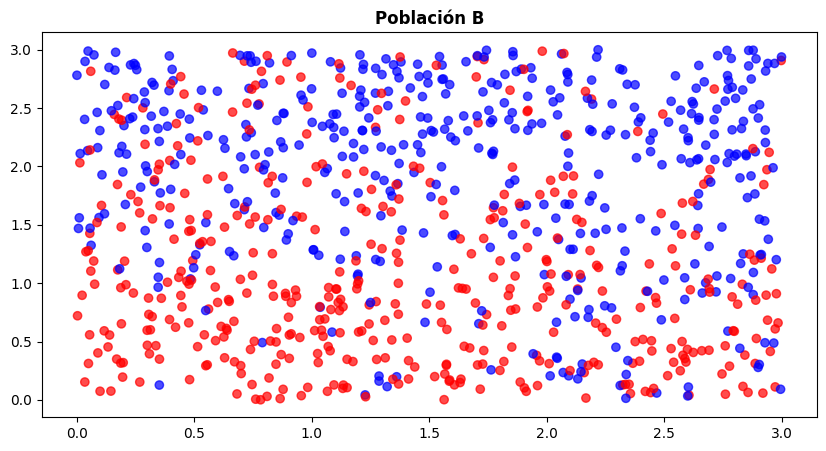

In [ ]:
plt.scatter(x=xs,y=ys,c=cs,alpha=0.7)
plt.title("Población B",weight="bold")
plt.show()

En este caso, veamos que sucede si tomamos una muestra por sector:

In [ ]:
nSec=lambda i: np.sum([int(np.floor(xs[k])+3*np.floor(ys[k]))==i for k in range(N)])
fSec=lambda i: np.sum([cs[k]=="b" for k in range(N) if int(np.floor(xs[k])+3*np.floor(ys[k]))==i])
fs=list(map(fSec,list(range(9))))
ns=list(map(nSec,list(range(9))))
pEs=np.round(np.array(fs)/np.array(ns)*100,2)
ns2=ns.copy()
print(ns2)
print(pEs)
pEs2=pEs.copy()

[91, 105, 112, 95, 84, 81, 113, 117, 102]
[ 4.4  13.33 33.93 43.16 51.19 59.26 69.91 82.05 90.2 ]


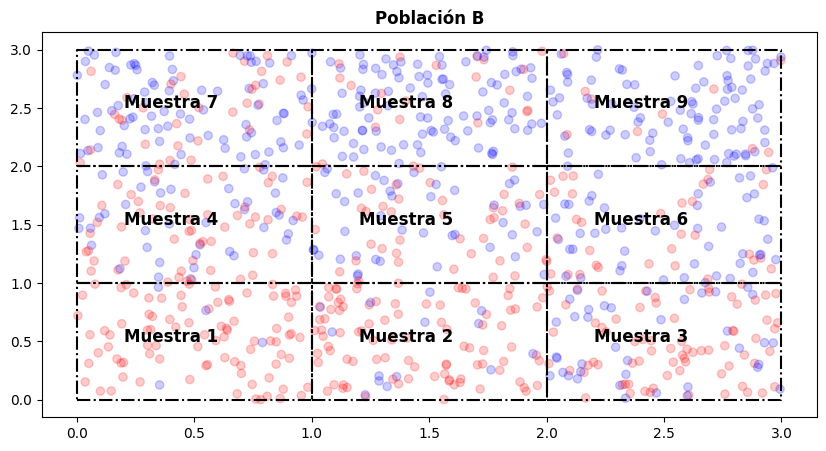

In [ ]:
plt.scatter(x=xs,y=ys,c=cs,alpha=0.2)
[plt.plot([i+0,i+1,i+1,i+0,i+0],[j+0,j+0,j+1,j+1,j+0],"k-.") for i in range(3) for j in range(3)]
[plt.text(x=i+0.2,y=j+0.5,s="Muestra "+str(int(i)+3*int(j)+1),size=12,weight="bold") for i in range(3) for j in range(3)]
plt.title("Población B",weight="bold")
plt.show()

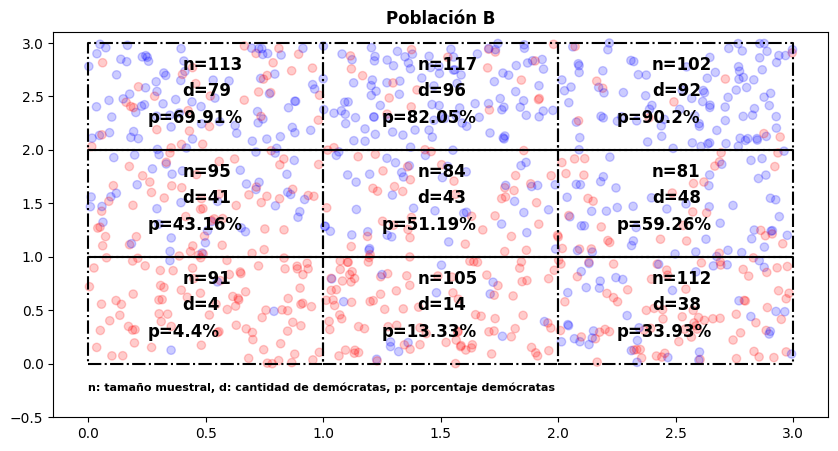

In [ ]:
plt.scatter(x=xs,y=ys,c=cs,alpha=0.2)
plt.title("Población B",weight="bold")
[plt.plot([i+0,i+1,i+1,i+0,i+0],[j+0,j+0,j+1,j+1,j+0],"k-.") for i in range(3) for j in range(3)]
[plt.text(x=i+0.4,y=j+0.75,s="n="+str(ns[int(i)+3*int(j)]),size=12,weight="bold") for i in range(3) for j in range(3)]
[plt.text(x=i+0.4,y=j+0.5,s="d="+str(fs[int(i)+3*int(j)]),size=12,weight="bold") for i in range(3) for j in range(3)]
[plt.text(x=i+0.25,y=j+0.25,s="p="+str(pEs[int(i)+3*int(j)])+"%",size=12,weight="bold") for i in range(3) for j in range(3)]
plt.text(x=0,y=-0.25,s="n: tamaño muestral, d: cantidad de demócratas, p: porcentaje demócratas" ,size=8,weight="bold")
plt.ylim([-0.5,3.1])
plt.show()

Se ve claramente que las distintas muestras dan valores muy heterogéneos. Es decir, no sólo es variable, sino que la mayoría de las muestras no parecen representar lo que pasa en la población.

Esto se puede ver mejor gráficamente. Si las muestras no se toman por sector "geográfico" y se toman de forma aleatoria, se observa lo siguiente:

In [ ]:
M=1000
n=100
pRand=[0]*M
np.random.seed(0)
for i in range(M):
  mues=np.random.choice(cs,replace=False,size=n)
  pRand[i]=np.sum(mues=="b")/n*100

In [ ]:
df=pd.DataFrame({"ps":pRand})
df_c=df.value_counts()
labs=[lab[0] for lab in df_c.index.values]
fS=[int(df_c.loc[lab]) for lab in labs]

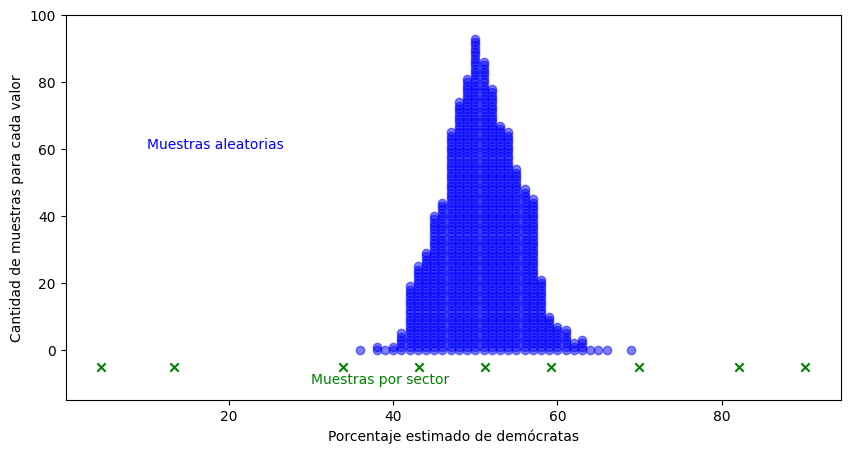

In [ ]:
K=len(labs)
for i in range(K):
  plt.scatter([labs[i]]*fS[i],np.arange(fS[i]),marker="o",c="b",alpha=0.5)
plt.scatter(pEs,[-5]*9,marker="x",c="g")
plt.text(x=10,y=60,s="Muestras aleatorias",color="b")
plt.text(x=30,y=-10,s="Muestras por sector",color="g")
plt.xlabel("Porcentaje estimado de demócratas")
plt.ylabel("Cantidad de muestras para cada valor")
plt.ylim([-15,100])
plt.show()

Más aún, la diferencia es muy notoria cuando se comparan los resultados de los intervalos de confianza obtenidos con la primer muestra por sector y una muestra aleatoria:

In [ ]:
ICSec=smp.proportion_confint(pEs[0]*ns2[0]/100,ns2[0])
print([ICSec[0]*100,ICSec[1]*100])
ICRand=smp.proportion_confint(n*pRand[0]/100,n)
print([ICRand[0]*100,ICRand[1]*100])

[0.1861149998001084, 8.613885000199891]
[33.296693568931616, 52.703306431068384]


Notar que en la muestra "por sector" se obtiene un rango de valores para porcentaje de demócratas entre 0.18% y  8.61%, muy distinto al de la muestra aleatoria que estima un rango entre 33.29% y 52.7%.

Esta diferencia abismal se debe a que la muestra tomada era un grupo muy homogéneo (mayormente republicanos), que no compartía la heterogeneidad observada en la población. Es decir, cuando hablamos de que el cálculo se hace a partir de una "distribución teórica", esa distribución teórica para la muestra por sector no era la misma que la distribución observada en la población. Por lo tanto, las conclusiones obtenidas no eran válidas ya que no se tenía una **muestra representativa** de la población.


Este es uno de los mayores problemas a la hora de sacar conclusiones a partir de una muestra, es muy fácil que surja el "sesgo de selección", en el que las observaciones de la muestra comparten características que sesgan los resultados (en este caso, una preferencia política), pero esas características no son extendidas de la misma forma a toda la población. Por lo tanto, del mismo modo que en clases anteriores hablamos del "overfitting", para prevenir este sesgo, las conclusiones deben estar basadas sobre datos lo más heterogéneos posibles para tener mayor validez a la hora de extrapolar dichos resultados.




### IC para diferencias de proporciones

Vimos recién que hay una diferencia muy grande entre las estimaciones calculadas por sector y las seleccionadas de forma aleatoria. Podríamos preguntarnos entonces si hay una forma de darle un rango de valores a la **diferencia** entre ambas observaciones. Luego el signo de esta diferencia nos podrá decir hacia cuál de las muestras se inclina esa diferencia.

La respuesta es que sí, pero debemos considerar **cómo varía** esa diferencia, ya que establecimos que la dispersión es clave en la amplitud del intervalo. Además, se tiene que contemplar que los tamaños muestrales pueden diferir, por lo que se le debería dar más peso a la estimación con mayor tamaño muestral, cuya estimación es más precisa. Teniendo esto en cuenta, la estrategia que se suele utilizar para calcular un rango de valores para la diferencia es la siguiente:
$$ \widehat{p_1}-\widehat{p_2}\underline{+} 1.96\cdot \sqrt{\dfrac{\widehat{p_1}\cdot (100-\widehat{p_1})}{n_1}+\dfrac{\widehat{p_2}\cdot (100-\widehat{p_2})}{n_2}} $$
donde $\widehat{p_1}$ y $\widehat{p_2}$ son los porcentajes estimados de ambas muestras, cada una con tamaño muestral $n_1$ y $n_2$, respectivamente.

En nuestro caso, la primer estimación por sectores nos dió un valor de $\widehat{p_1}=4.4\%$ sobre un total de $n_1=91$ personas, mientras que la aleatoria dio como resultado $\widehat{p_2}=43\%$ a partir de una muestra de $n_2=100$ personas. Por lo que la estimación para la diferencia daría como resultado:

In [ ]:
p1=pEs[0];p2=pRand[0];n1=ns2[0];n2=n
zC=stats.norm().ppf(0.975)
Err=zC*np.sqrt(p1*(100-p1)/n1+p2*(100-p2)/n2)
print([p1-p2-Err,p1-p2+Err])

[-49.17879872623176, -28.02120127376824]


Por lo tanto, el porcentaje de demócratas en la muestra sectorial es entre 28% y 49% **menor** (por el signo negativo) que el de la muestra aleatoria. En Python, esto se puede realizar directamente del siguiente modo:

In [ ]:
ICDif=smp.confint_proportions_2indep(n1*p1/100,n1,n2*p2/100,n2,method="wald",correction=False)
print([ICDif[0]*100,ICDif[1]*100])

[-49.17879872623176, -28.02120127376824]


Del mismo modo, si invertimos el orden, nos dará su contraparte positiva:

In [ ]:
ICDif=smp.confint_proportions_2indep(n2*p2/100,n2,n1*p1/100,n1,method="wald",correction=False)
print([ICDif[0]*100,ICDif[1]*100])

[28.02120127376824, 49.17879872623176]


Si el intervalo de confianza para la diferencia incluye al cero, da cuenta de que los porcentajes no son tan distintos entre las dos poblaciones. Por ejemplo, si tomamos dos de las muestras aleatorias (que daban siempre valores similares), obtenemos lo siguiente:




In [ ]:
p1=pRand[0];p2=pRand[2];n1=n;n2=n
ICDif=smp.confint_proportions_2indep(n1*p1/100,n1,n2*p2/100,n2,method="wald",correction=False)
print([ICDif[0]*100,ICDif[1]*100])

[-19.789568942659493, 7.7895689426594945]


Esto se debe a que las muestras aleatorias, como su nombre indica, recorrieron **todos** los sectores, donde se observaban distintas concentraciones de demócratas. Por lo tanto, al representar ambas muestras la heterogeneidad de la población, no hay una diferencia sustancial entre los porcentajes observados.

## Intervalos de confianza para medias

Hasta ahora analizamos lo que ocurre a la hora de estimar porcentajes. Sin embargo, hay otros parámetros poblacionales que pueden necesitar estimarse. Consideremos la siguiente población, en la que cada individuo es representado con un tamaño según su ingreso mensual. Podríamos querer saber a partir de una muestra, qué rango de valores puede tener el ingreso promedio de la población (llamémoslo $\mu$).

In [ ]:
def ing(x,y,u,a):
  xR=np.ceil(x)
  yR=np.floor(y)
  ind=int(xR+3*yR)
  I=float(a[ind,0])+(float(a[ind,1])-float(a[ind,0]))*u
  return I

In [ ]:
a1=[0.1]*11
a2=[1.1]*11
a=np.array([a1,a2])
a=a.T

In [ ]:
np.random.seed(0)
us=np.random.lognormal(1,1,N)
Is=[ing(xs[i],ys[i],us[i],a) for i in range(N)]
print(Is)

[15.963999282156696, 4.155837528323913, 7.333608293671008, 25.65653863572279, 17.694000973291043, 1.1229822338709152, 7.129309067228059, 2.4364736176619064, 2.5516987415930035, 4.1984075750613465, 3.239437272125864, 11.737975568703893, 5.918472237564775, 3.1699921865336718, 4.337032883912559, 3.8949617334116566, 12.210575427497233, 2.3140905587643297, 3.8175606042895156, 1.2570854041990627, 0.31161433917131254, 5.3258559125013525, 6.552297047862678, 1.3941252439288911, 26.40488396376717, 0.7348505420780594, 2.9455561088062527, 2.354247354811148, 12.688443547961665, 11.914868372906817, 3.2738565498449668, 4.06760452986099, 1.2187525303501723, 0.4750122944969599, 2.019544370168257, 3.2783079662653676, 9.402569764258764, 9.146517244521654, 1.9453577895961758, 2.1091208722920802, 1.0526068830821627, 0.7570350343543539, 0.5934813606021628, 19.220774138746588, 1.7328840680719955, 1.8540470156158053, 0.8766267944316877, 6.01499324744908, 0.6412370924820859, 2.297366767875443, 1.21019251675809

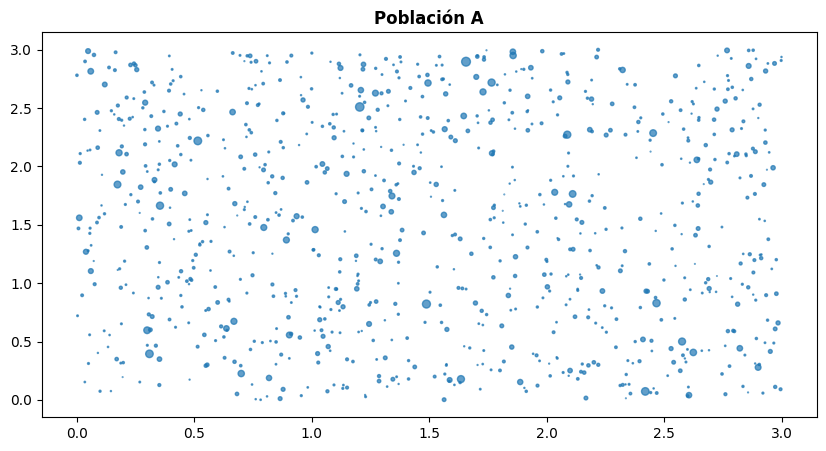

In [ ]:
plt.scatter(x=xs,y=ys,s=Is,alpha=0.7)
plt.title("Población A",weight="bold")
plt.show()

Si en este caso tomamos muestras sectoriales, podemos darnos una primer idea de los valores que suelen tomar los promedios. Supongamos que el ingreso mensual se mide en dólares. Pero como dijimos anteriormente, un componente clave de la construcción del rango de valores es la **variabilidad**. Por lo tanto, no sólo mostramos el ingreso promedio en cada muestra, sino que también calculamos el desvío estándard.

**Comentario:** En el caso de los porcentajes, no hizo falta estimar el desvío porque se puede calcular a partir de los porcentajes estimados y el tamaño muestral. Pero en el caso de tomar una variable cualquiera, esas simplificaciones dejan de ser válidas.

In [ ]:
nSec=lambda i: np.sum([int(np.floor(xs[k])+3*np.floor(ys[k]))==i for k in range(N)])
mSec=lambda i: np.mean([Is[k] for k in range(N) if int(np.floor(xs[k])+3*np.floor(ys[k]))==i])
sSec=lambda i: np.std([Is[k] for k in range(N) if int(np.floor(xs[k])+3*np.floor(ys[k]))==i])
ns=list(map(nSec,list(range(9))))
ms=list(map(mSec,list(range(9))))
ss=list(map(sSec,list(range(9))))
mEs=np.round(np.array(ms)*100,2)
sEs=np.round(np.array(ss)*100,2)

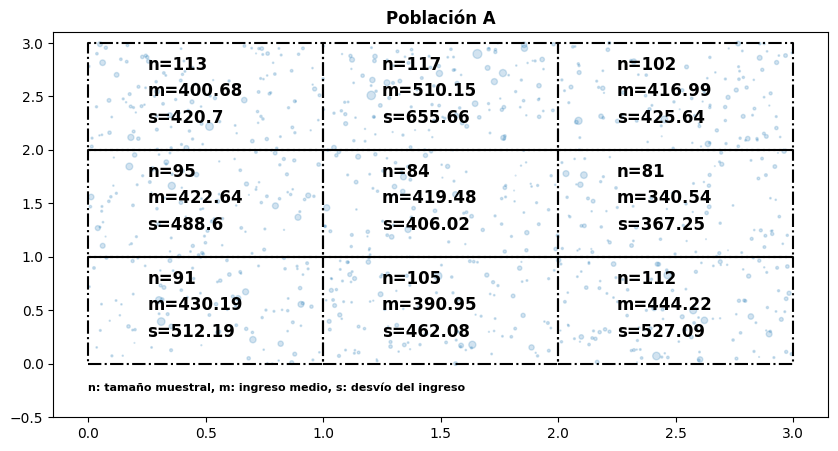

In [ ]:
plt.scatter(x=xs,y=ys,s=Is,alpha=0.2)
plt.title("Población A",weight="bold")
[plt.plot([i+0,i+1,i+1,i+0,i+0],[j+0,j+0,j+1,j+1,j+0],"k-.") for i in range(3) for j in range(3)]
[plt.text(x=i+0.25,y=j+0.75,s="n="+str(ns[int(i)+3*int(j)]),size=12,weight="bold") for i in range(3) for j in range(3)]
[plt.text(x=i+0.25,y=j+0.5,s="m="+str(mEs[int(i)+3*int(j)]),size=12,weight="bold") for i in range(3) for j in range(3)]
[plt.text(x=i+0.25,y=j+0.25,s="s="+str(sEs[int(i)+3*int(j)]),size=12,weight="bold") for i in range(3) for j in range(3)]
plt.text(x=0,y=-0.25,s="n: tamaño muestral, m: ingreso medio, s: desvío del ingreso" ,size=8,weight="bold")
plt.ylim([-0.5,3.1])
plt.show()

Vemos que los promedios por muestras suelen estar entre 350 y 450 USD. Además, los desvíos son muy elevados, en general esto se debe a que valores extremos suelen tener mucha incidencia tanto sobre los promedios como los desvíos estándard.

En general, las distribuciones de los ingresos suelen ser muy asimétricas, por lo que las medias y los desvíos elevados pueden responder a los valores extremos que suelen aparecer en este tipo de variables.

De todas formas, tomamaremos varias muestras aleatorias de tamaño 100 y mostramos cómo se distribuyen los promedios:

In [ ]:
M=5000
n=100
mEs=[0]*M
np.random.seed(0)
for i in range(M):
  mues=np.random.choice(Is,replace=False,size=n)
  mEs[i]=np.round(np.mean(mues)*100)

In [ ]:
df=pd.DataFrame({"ms":mEs})
df_c=df.value_counts()
labs=[lab[0] for lab in df_c.index.values]
fS=[int(df_c.loc[lab]) for lab in labs]

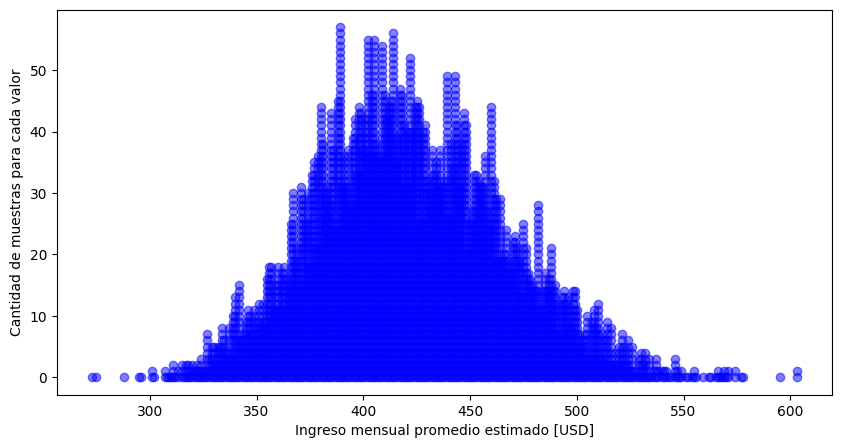

In [ ]:
K=len(labs)
for i in range(K):
  plt.scatter([labs[i]]*fS[i],np.arange(fS[i]),marker="o",c="b",alpha=0.5)
plt.xlabel("Ingreso mensual promedio estimado [USD]")
plt.ylabel("Cantidad de muestras para cada valor")
plt.show()

Nuevamente, si bien tiene una ligera asimetría, tiene forma aproximada a una campana normal. Por lo tanto, para realizar un intervalo de confianza para $\mu$, se utiliza la siguiente fórmula:
$$ \overline{x} \underline{+} 1.96 ⋅ \dfrac{s}{\sqrt{n}} $$
donde $\overline{x}$ representa la media **muestral**, $s$ representa el desvío **muestral**, $n$ es el tamaño de muestra y $1.96$ es el valor utilizado en los intervalos considerados previamente, que permite descartar el 2.5% de los datos más extremos en una distribución normal.

En nuestro caso, tomando alguna de las muestras podemos calcular la media, el desvío y así calcular el intervalo.

In [ ]:
m=np.mean(mues)*100;s=np.std(mues)*100
Err=zC*s/np.sqrt(100)
IC100=[m-Err,m+Err]
print(IC100)

[324.3390262840983, 502.93576747429506]


Por lo tanto, el intervalo de confianza para la media **poblacional** del ingreso mensual es entre 324.33 y 502.93 USD.

Nuevamente, recordemos que a mayor tamaño muestral, más preciso es el intervalo y puede dar un rango de valores más estrecho:

In [ ]:
n=500
Err=zC*s/np.sqrt(n)
IC500=[m-Err,m+Err]
print(IC500)

[373.701951493075, 453.57284226531834]


Con esta muestra, obtenemos un intervalo de confianza más preciso para la media **poblacional** del ingreso mensual es entre 403.41 y 493.1 USD.

## Cálculo en python

En python, estos cálculos se realizan de dos maneras distintas. La siguiente función permite calcular el intervalo a partir de la media y del desvío ya calculados:

In [ ]:
import statsmodels.stats.weightstats as smsw
smsw._zconfint_generic(m, s/np.sqrt(100), 0.05, alternative="two-sided")

(324.3390262840983, 502.93576747429506)

y la siguiente permite calcular el intervalo de confianza utilizando directamente el conjunto de datos, en el que se calcula la media y el desvío automáticamente para hacer la cuenta:

In [ ]:
print(smsw.zconfint(mues*100,ddof=0))

(324.3390262840982, 502.935767474295)


### Comparación de medias

En el caso de tener dos poblaciones o muestras, podría tener sentido comparar la media en ambas, para ver si hay alguna diferencia.

Estas comparaciones pueden darse de dos maneras:

* Las muestras se asumen independientes. En este caso, las muestras no tienen necesariamente influencia entre sí.

* Las muestras se asumen apareadas. En este caso, las muestras tienen características similares entre sí o más aún, son dos observaciones sobre los mismos individuos.

## Caso independiente

En el caso en el que las muestras sean independientes, pueden darse distintos tamaños muestrales. Por lo tanto, la variabilidad debe considerar esta diferencia.

Por lo tanto, el intervalo de confianza para la diferencia se calcula del siguiente modo:
$$\overline{x}_1-\overline{x}_2 \underline{+} 1.96 \sqrt{\dfrac{s_1^2}{n_1}+\dfrac{s_2^2}{n_2}} $$
donde $\overline{x}_1$, $\overline{x}_2$ son las medias de cada muestra, $n_1$, $n_2$ son los tamaños de cada muestra y $s_1$, $s_2$ son los tamaños de cada muestra.

A veces, se puede considerar que los desvíos de ambas muestras son iguales y se ajusta el cálculo de la siguiente manera:
$$\overline{x}_1-\overline{x}_2 \underline{+} 1.96 \cdot s_p \cdot \sqrt{\dfrac{1}{n_1}+\dfrac{1}{n_2}} $$
donde $s_p^2$ se denomina en inglés "pooled variance" y se calcula de la siguiente manera:
$$s_p=\sqrt{\dfrac{s_1^2\cdot (n_1-1)+s_2^2\cdot (n_2-1) }{n_1+n_2-2}} $$



### Caso independiente

En python, se puede realizar con el comando `zconfint`, pasando como argumentos dos vectores de datos. Actualmente no está implementada la fórmula asumiendo desvíos desiguales para este comando. Tomemos por ejemplo, otra muestra aleatoria de tamaño 500 del vector anterior que debería ser similar al anterior, pero con otro tamaño muestral.

In [ ]:
n2=500
mues2=np.random.choice(Is,replace=False,size=n2)

In [ ]:
ICcomp=smsw.zconfint(mues*100,mues2*100,ddof=0)
print([np.round(ICcomp[0],2),np.round(ICcomp[1],2)])

[-117.57, 92.5]


Vemos que el intervalo de confianza incluye al cero, por lo que no se sustenta una diferencia estadística entre las medias. Esto se debe a que ambas muestras eran aleatorias de la misma población y que por lo tanto, no deberían diferir mucho.

## Muestras distintas

Sin embargo, consideremos muestras que sabemos que son distintas, el primer decil y el último decil:

In [ ]:
N=len(Is)
d1=np.quantile(Is,0.1)
d9=np.quantile(Is,0.9)
d1m=[Is[i]*100 for i in range(N) if Is[i]<=d1]
d9m=[Is[i]*100 for i in range(N) if Is[i]>=d9]
ICcomp=smsw.zconfint(d1m,d9m,ddof=0)
print([np.round(ICcomp[0],2),np.round(ICcomp[1],2)])

[-1689.81, -1412.15]


Vemos que la diferencia entre el ingreso medio del primer decil y el último decil es negativo. Esto tiene sentido porque justamente se compara el grupo de menores ingresos con el de mayores ingresos.

## Caso apareado

En el caso en el que las mediciones se realicen en dos momentos distintos sobre **la misma** muestra, las muestras no pueden asumirse independientes. El impacto sobre el cálculo es mayoritariamente sobre la variabilidad, ya que al ser los mismos individuos, la variabilidad tiende a reducirse ya que las características de las muestras son similares.

Además, vale aclarar que los tamaños muestrales son iguales $n_1=n_2=2$. Por lo tanto, el cálculo se basa en las diferencias entre los valores observados entre ambas mediciones. Es decir, se toma el vector $d=x_1-x_2$ donde $x_1$ son los datos de la primer medición y $x_2$ son los datos de la segunda medición. Como las observaciones mantienen el mismo orden, la resta $d$ compara el antes y el después de **los mismos** individuos:
$$ \overline{d}\underline{+} 1.96 \cdot \sqrt{\dfrac{s_d}{n}} $$
donde $\overline{d}$ es el promedio de las diferencias y $s_d$ es el desvío de las diferencias.

## Datos apareados en Python

Aunque no sean las mismas muestras, utilicemos a modo de ejemplo la comparación entre dos muestras aleatorias asumiendo que una medición es antes y otra es después. Restamos ambos vectores y utilizamos el intervalo de confianza para una variable (en este caso, la variable de diferencia):

In [ ]:
n=100
mues1=np.random.choice(Is,replace=False,size=n)
mues2=np.random.choice(Is,replace=False,size=n)
difs=np.array(mues1*100)-np.array(mues2*100)
ICpaircomp=smsw.zconfint(difs)
print([np.round(ICpaircomp[0],2),np.round(ICpaircomp[1],2)])

[-1.52, 0.86]


Si hubiéramos asumido las muestras como independientes, hubiéramos obtenido un intervalo más amplio:

In [ ]:
ICcomp=smsw.zconfint(mues1*100,mues2*100)
print([np.round(ICcomp[0],2),np.round(ICcomp[1],2)])

[-1.57, 0.91]


## Aplicación gráfica

Muchas veces, en los gráficos se agrega un rango de valores que no siempre son estrictamente intervalos de confianza, pero sí dan una noción de cuánta variabilidad y por lo tanto, cuánta precisión tienen las estimaciones. Vemos aquí dos ejemplos, en regresión y en gráficos de barras, volviendo a la base de los inmuebles.

In [ ]:
import seaborn as sns

In [ ]:
# Importo la librería necesaria
import pandas as pd
# El link a la base de datos como string
url = 'https://raw.githubusercontent.com/DataScienceForPublicPolicy/diys/main/data/home_sales_nyc.csv'
# Se usa la librería pandas para leer el .csv
df = pd.read_csv(url)

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]

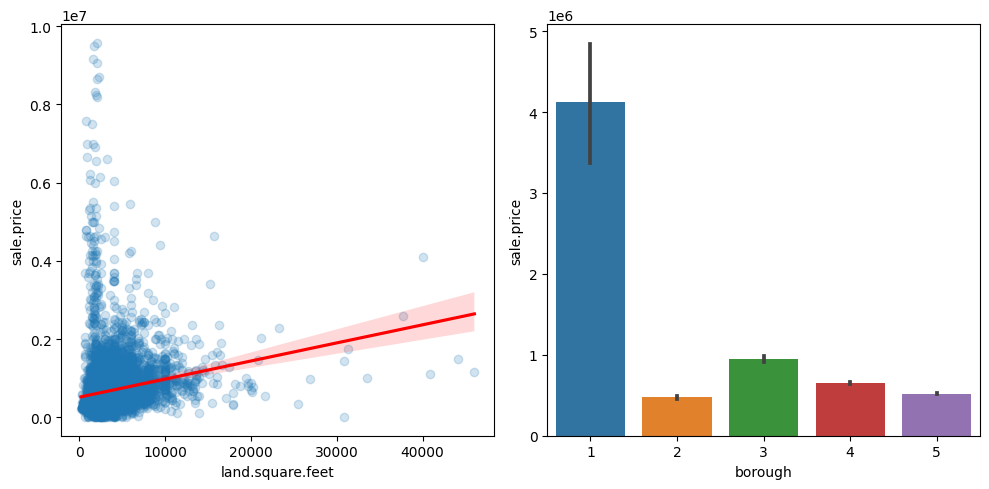

In [ ]:
fig,axes=plt.subplots(1,2)
sns.regplot(data=df,x="land.square.feet",y="sale.price",ax=axes[0],ci=99.99,fit_reg=True,scatter_kws={"alpha":0.2},line_kws={"color":"red"})
sns.barplot(data=df,x="borough",y="sale.price",ax=axes[1])
fig.tight_layout()
plt.show()

En ambos casos, los rangos más amplios representan mayor variabilidad y por lo tanto, se puede considerar que menos datos estuvieron involucrados en la estimación.

## Comentarios finales

En general, el desarrollo de distintos intervalos de confianza suele tener la limitación de necesitar la "distribución teórica" que no siempre es conocida o verificable.

La distribución más utilizada es la distribución normal ya vista, ya que hay una herramienta teórica muy importante para la estadística (TCL), que establece que, para **cualquier variable**, cuando se toma un **tamaño muestral grande** (en general, si $n>50$, se acepta como válido), y las observaciones **no tienen influencia** entre sí (se denomina hipótesis de independencia), el **promedio** de las observaciones tiene **distribución aproximadamente normal**. Por lo tanto, la mayoría de los intervalos de confianza se basan en esta herramienta ya que vale para cualquier tipo de variable, y no siempre hay distribuciones teóricas para cualquier variable.